# Support Vector Machine (classifier) From First Principles

### 1. Lý thuyết

#### Hyperplane

`Hyperplane`: Một hyperplane là một ranh giới quyết định (decision boundary) dùng để phân tách một tập các điểm dữ liệu có nhãn lớp khác nhau.

> Có thể hiểu đơn giản là nó có nhiệm vụ giúp chia dữ liệu thành các lớp khác nhau

> Trong 2D: hyperplane là một đường thẳng

> Trong 3D: hyperplane là một mặt phẳng

> Trong nD: hyperplane là một mặt phẳng n-1 chiều

#### Support Vectors

` Support Vectors `: là các điểm dữ liệu mẫu nằm gần hyperplane nhất. Những điểm dữ liệu này sẽ xác định đường phân tách hoặc hyperplane một cách chính xác hơn thông qua việc tính toán margin.

> Có thể hiểu đơn giản là những điểm dữ liệu gần đường phân tách nhất

> Là những điểm dữ liệu gần đường phân tách nhất

> Chỉ một số ít điểm quyết định vị trí của hyperplane. Nếu bạn xóa các điểm xa, hyperplane không đổi nhưng nếu dịch chuyển 1 support vector, hyperplane đổi ngay

#### Margin

`Margin` là khoảng cách phân tách giữa hai đường nằm trên các điểm dữ liệu gần nhất. Nó được tính là khoảng cách vuông góc từ đường phân tách đến các support vectors hoặc các điểm dữ liệu gần nhất. Trong SVM, hãy cố gắng tối đa hóa khoảng cách phân tách này để đạt được margin lớn nhất.

> Có thể hiểu đơn giản là `Margin` = khoảng cách từ hyperplane đến support vectors

> SVM không chỉ muốn phân loại đúng, mà muốn phân loại an toàn nhất

> Margin lớn => model: Ít nhạy với nhiễu, tổng quát hóa tốt, ít overfitting


“Không chỉ đúng, mà phải cách xa ranh giới”

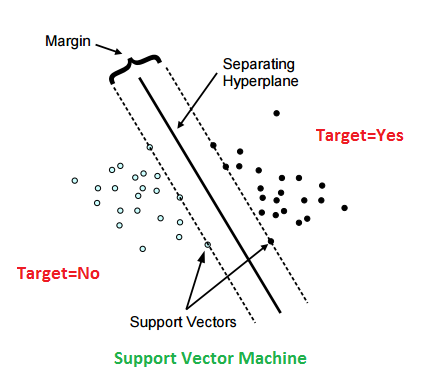

#### SVM

`SVM`: Trong SVM, mục tiêu chính của chúng ta là chọn một hyperplane có margin lớn nhất có thể giữa các support vectors trong tập dữ liệu cho trước. SVM tìm kiếm hyperplane có margin lớn nhất theo quy trình 2 bước sau:

- 1. Tạo ra các hyperplane phân tách các lớp theo cách tốt nhất có thể. Có rất nhiều hyperplane có thể phân loại dữ liệu. Chúng ta nên tìm hyperplane tốt nhất, đại diện cho sự phân tách lớn nhất (margin) giữa hai lớp.

- 2. Vì vậy, ta chọn hyperplane sao cho khoảng cách từ nó đến các support vectors ở mỗi phía là lớn nhất. Nếu tồn tại một hyperplane như vậy, nó được gọi là maximum margin hyperplane và bộ phân loại tuyến tính mà nó xác định được gọi là maximum margin classifier.

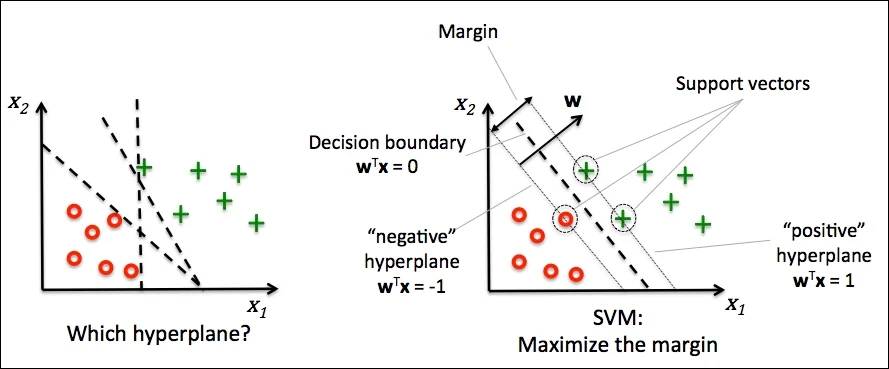

Đôi khi, các điểm dữ liệu mẫu bị phân tán đến mức không thể tách chúng bằng một hyperplane tuyến tính. Trong trường hợp đó, SVM sử dụng kernel trick để biến đổi không gian đầu vào sang một không gian có số chiều cao hơn. Nó sử dụng một hàm ánh xạ để biến đổi không gian đầu vào 2 chiều sang không gian 3 chiều... Lúc này, chúng ta có thể dễ dàng phân tách các điểm dữ liệu bằng cách sử dụng phân tách tuyến tính.

> Hiểu đơn giản là biến đổi dữ liệu sang không gian cao hơn để tách tuyến tính

#### Kernel

Trong thực tế, thuật toán SVM được triển khai bằng cách sử dụng một `kernel`. Nó sử dụng một kỹ thuật gọi là kernel trick. Nói một cách đơn giản, kernel chỉ là một hàm ánh xạ dữ liệu sang không gian có số chiều cao hơn, nơi mà dữ liệu có thể được phân tách. Kernel biến đổi không gian dữ liệu đầu vào có số chiều thấp sang không gian có số chiều cao hơn.

 Do đó, nó chuyển các bài toán không thể phân tách tuyến tính thành các bài toán có thể phân tách tuyến tính bằng cách bổ sung thêm chiều. Vì vậy, kernel trick giúp chúng ta xây dựng một bộ phân loại chính xác hơn. Do đó, nó rất hữu ích trong các bài toán phân tách phi tuyến.

 > Hiểu đơn giản là biến dữ liệu sang không gian cao hơn để có thể vẽ được “đường thẳng” chia dữ liệu và không thực sự tạo thêm chiều, chỉ tính tích vô hướng thông qua kernel => tiết kiệm tính toán

 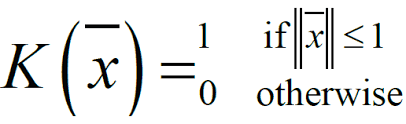

Có 4 loại kernel phổ biến
- Kernel tuyến tính (Linear kernel)
- Kernel đa thức (Polynomial kernel)
- Kernel hàm cơ sở xuyên tâm (Radial Basis Function - RBF, còn gọi là Gaussian kernel)
- Kernel Sigmoid

##### `Kernel tuyến tính (Linear kernel)`

**K(xi , xj ) = xiT xj**

Kernel tuyến tính được sử dụng khi dữ liệu có thể phân tách tuyến tính. Điều này có nghĩa là dữ liệu có thể được phân tách bằng một đường thẳng duy nhất. Đây là một trong những kernel phổ biến nhất.

Nó thường được sử dụng khi tập dữ liệu có số lượng đặc trưng rất lớn. Kernel tuyến tính thường được dùng trong các bài toán phân loại văn bản.

Việc huấn luyện với kernel tuyến tính thường nhanh hơn, vì chúng ta chỉ cần tối ưu tham số điều chuẩn hóa C. Khi huấn luyện với các kernel khác, chúng ta cũng cần tối ưu thêm tham số γ. Do đó, việc thực hiện grid search sẽ tốn nhiều thời gian hơn.

> Dùng khi dữ liệu tuyến tính nhiều feature

##### `Kernel đa thức (Polynomial kernel)`

**K(xi , xj ) = (γxiT xj + r)d , γ > 0**

Kernel đa thức biểu diễn độ tương đồng của các vector (các mẫu huấn luyện) trong không gian đặc trưng thông qua các đa thức của các biến gốc. Kernel đa thức không chỉ xem xét các đặc trưng ban đầu của các mẫu đầu vào để xác định độ tương đồng, mà còn xem xét các tổ hợp của các đặc trưng đầu vào.

Kernel đa thức rất phổ biến trong Xử lý Ngôn ngữ Tự nhiên (NLP). Bậc phổ biến nhất là d = 2 (bậc hai), vì các bậc lớn hơn thường dẫn đến overfitting trong các bài toán NLP. Nó có thể được trực quan hóa bằng sơ đồ sau.

> Học tương tác giữa các feature

##### `Kernel hàm cơ sở xuyên tâm (Radial Basis Function - RBF, còn gọi là Gaussian kernel)`

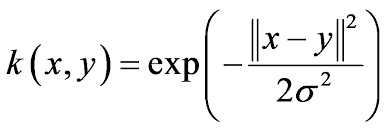

Kernel hàm cơ sở xuyên tâm (RBF) là một kernel đa dụng. Nó được sử dụng khi chúng ta không có kiến thức trước về dữ liệu,

> Điểm gần nhau => similarity cao

> Điểm xa nhau => similarity ≈ 0

> Dùng khi:
Không biết hình dạng dữ liệu
và biên phân tách phi tuyến phức tạp

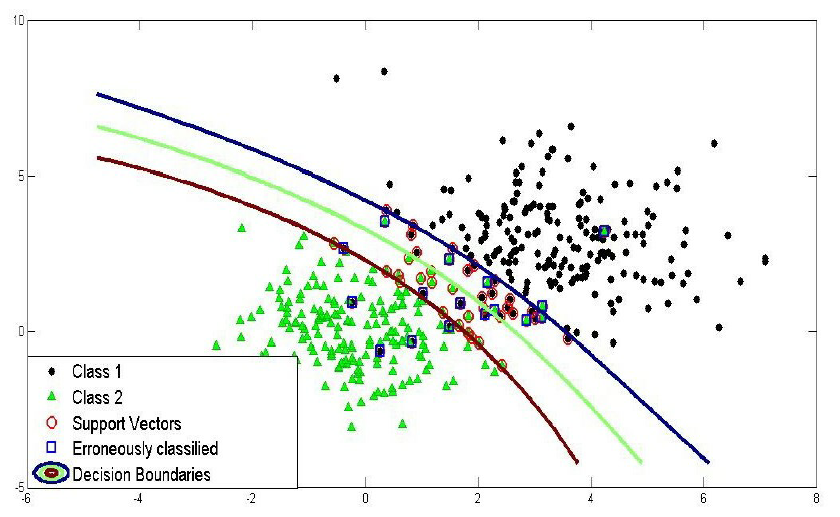

##### `Kernel Sigmoid`

**k (x, y) = tanh(αxTy + c)**

Kernel Sigmoid có nguồn gốc từ mạng nơ-ron. Chúng ta có thể sử dụng nó như một sự thay thế (proxy) cho mạng nơ-ron.

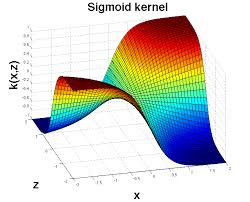

> ít dùng

---

### 2. Thực hành SVM Scikit-Learn

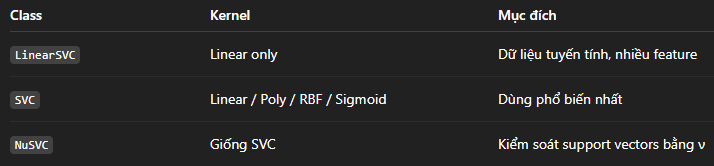

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('pulsar_stars.csv')

#### Phân tích dữ liệu

In [ ]:
df.shape

(17898, 9)

In [ ]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

có khoảng trắng ở trước tên cột => Tiến hành xóa khoảng trắng

In [ ]:
df.columns.str.strip()

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

Tên cột dài quá nên để dễ làm việc => đổi tên cột

In [ ]:
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness',
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [ ]:
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [ ]:
df['target_class'].value_counts()

,count
target_class,
0,16259
1,1639


> phân phối cột 'y' lệch

In [ ]:
df['target_class'].value_counts()/(len(df))

,count
target_class,
0,0.908426
1,0.091574


=> nhãn lớp 0 và 1 là 90,84% và 9,16%

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      17898 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        17898 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Từ tóm tắt trên => dữ liệu không bị thiếu

In [ ]:
round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


Có thể có ngoại lai nhưng vẽ boxplot cho chắc

Text(0, 0.5, 'DM-SNR Skewness')

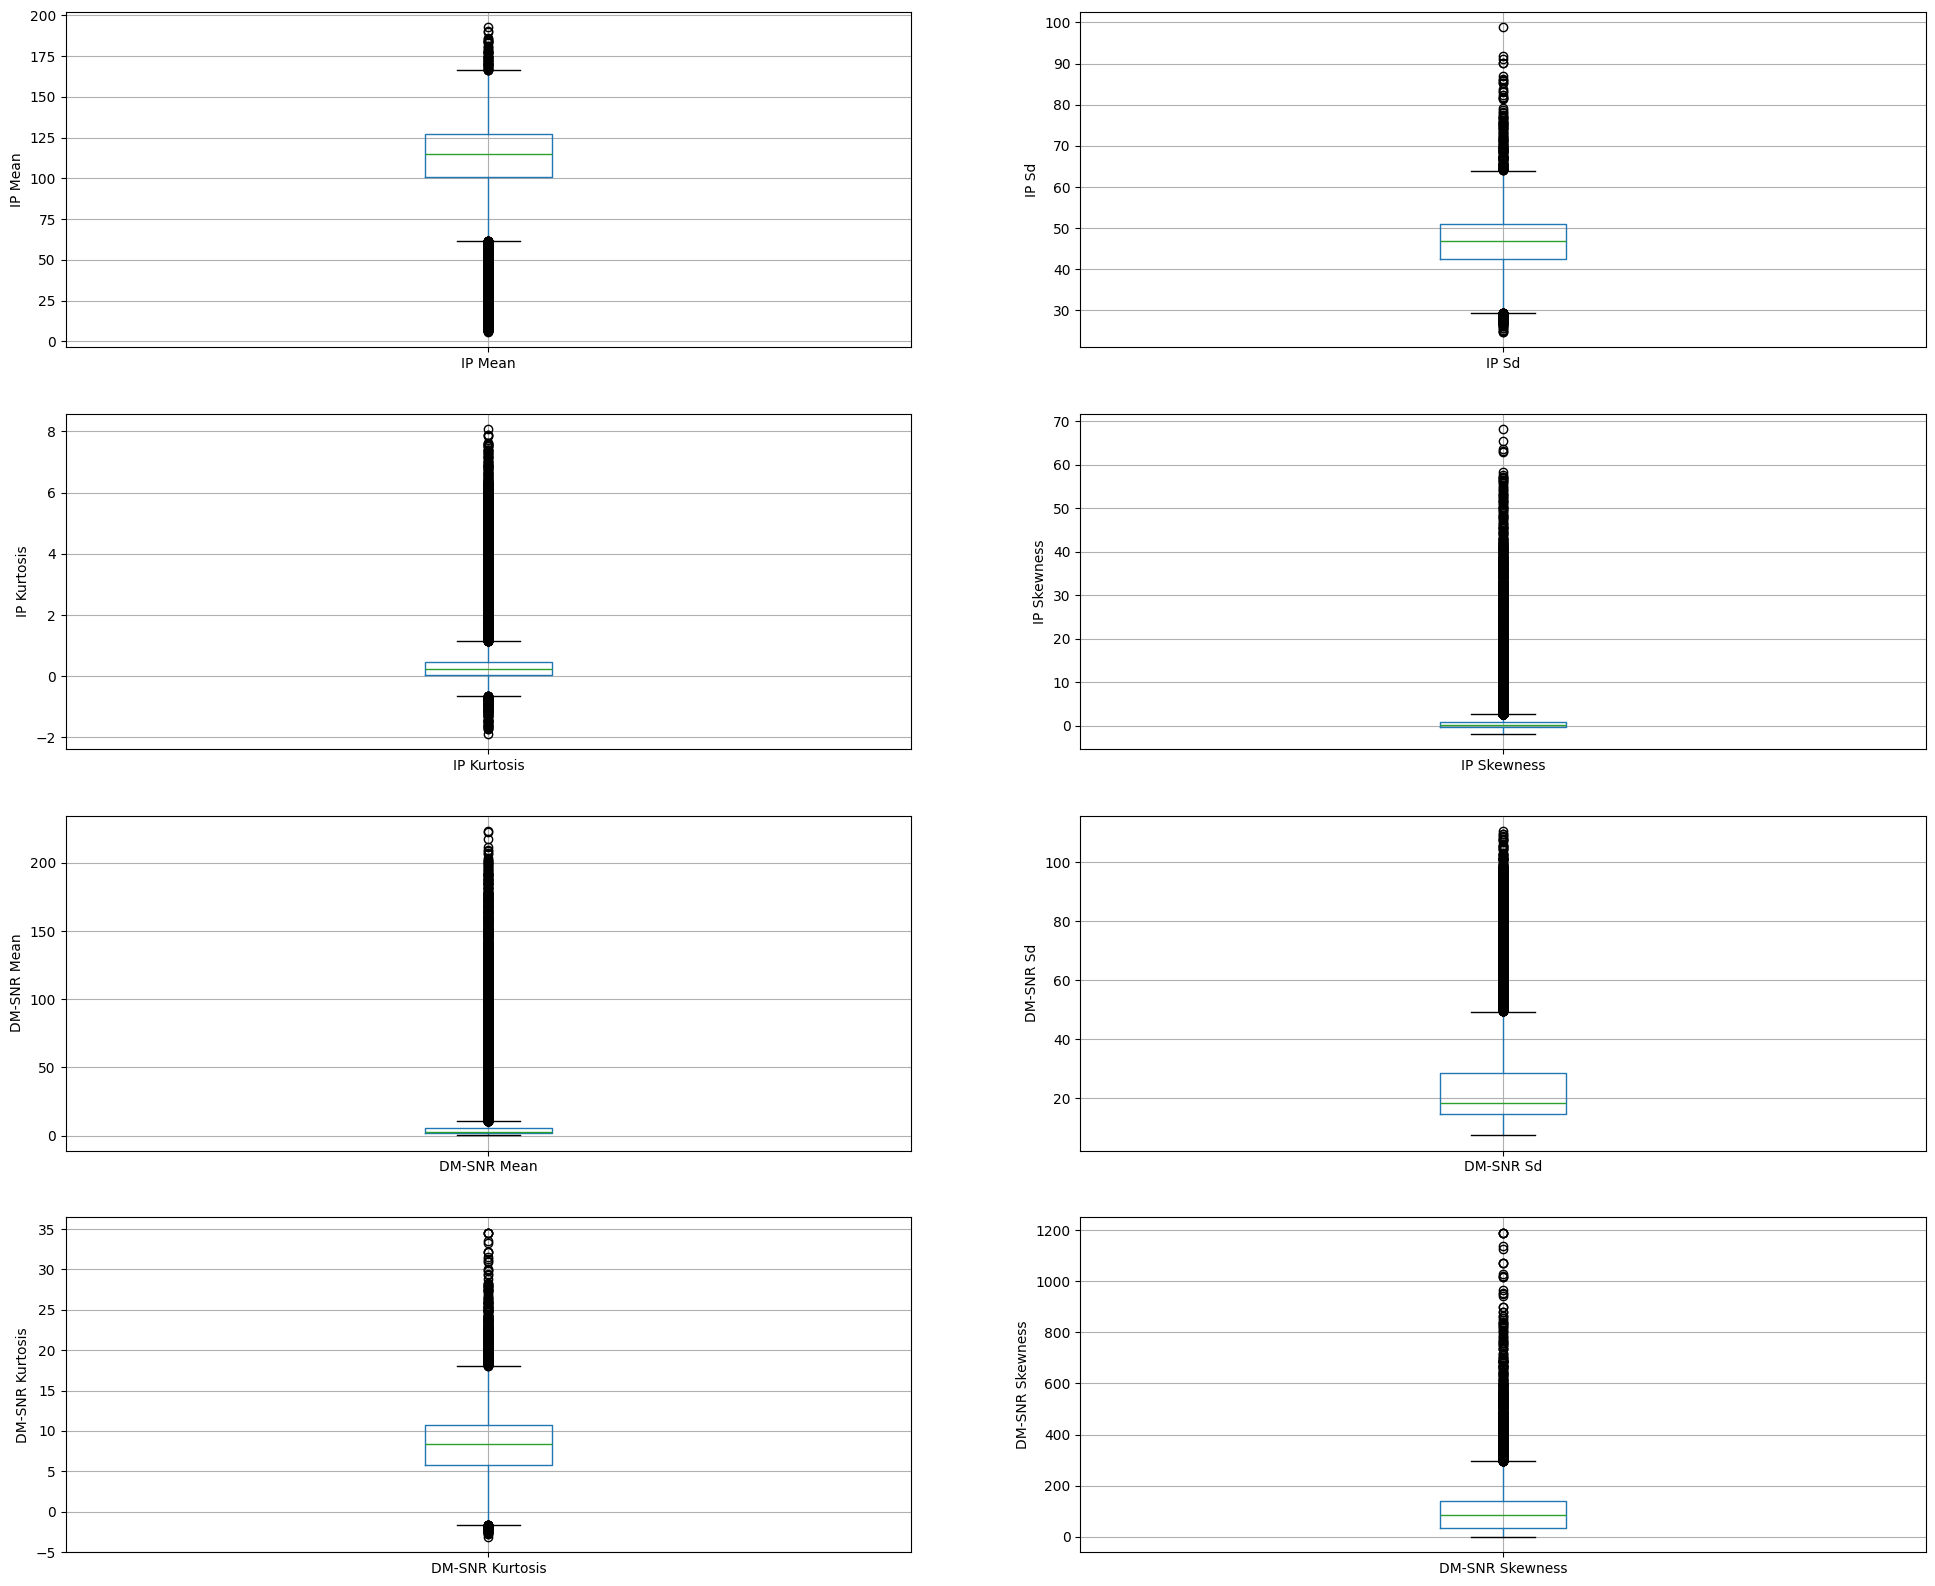

In [ ]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')

plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')

plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')

plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

=> Rất nhiều ngoại lai

> Có 2 biến thể của SVM. Đó là biến thể hard-margin SVM và soft-margin SVM.

`hard-margin SVM` Chỉ cần 1 outlier => không tìm được hyperplane hoặc hyperplane bị bóp méo

Dùng khi:

- Dữ liệu sạch

- Không có outlier

---

`soft-margin SVM` “Sai một chút cũng được, miễn là tổng thể tốt”

SVM cho phép:

- Một số điểm:

- Bị phân loại sai hoặc nằm trong margin

Đổi lại: trả giá bằng C (C càng lớn => càng ghét sai)



Quan sát phân phối các cột

Text(0, 0.5, 'Number of pulsar stars')

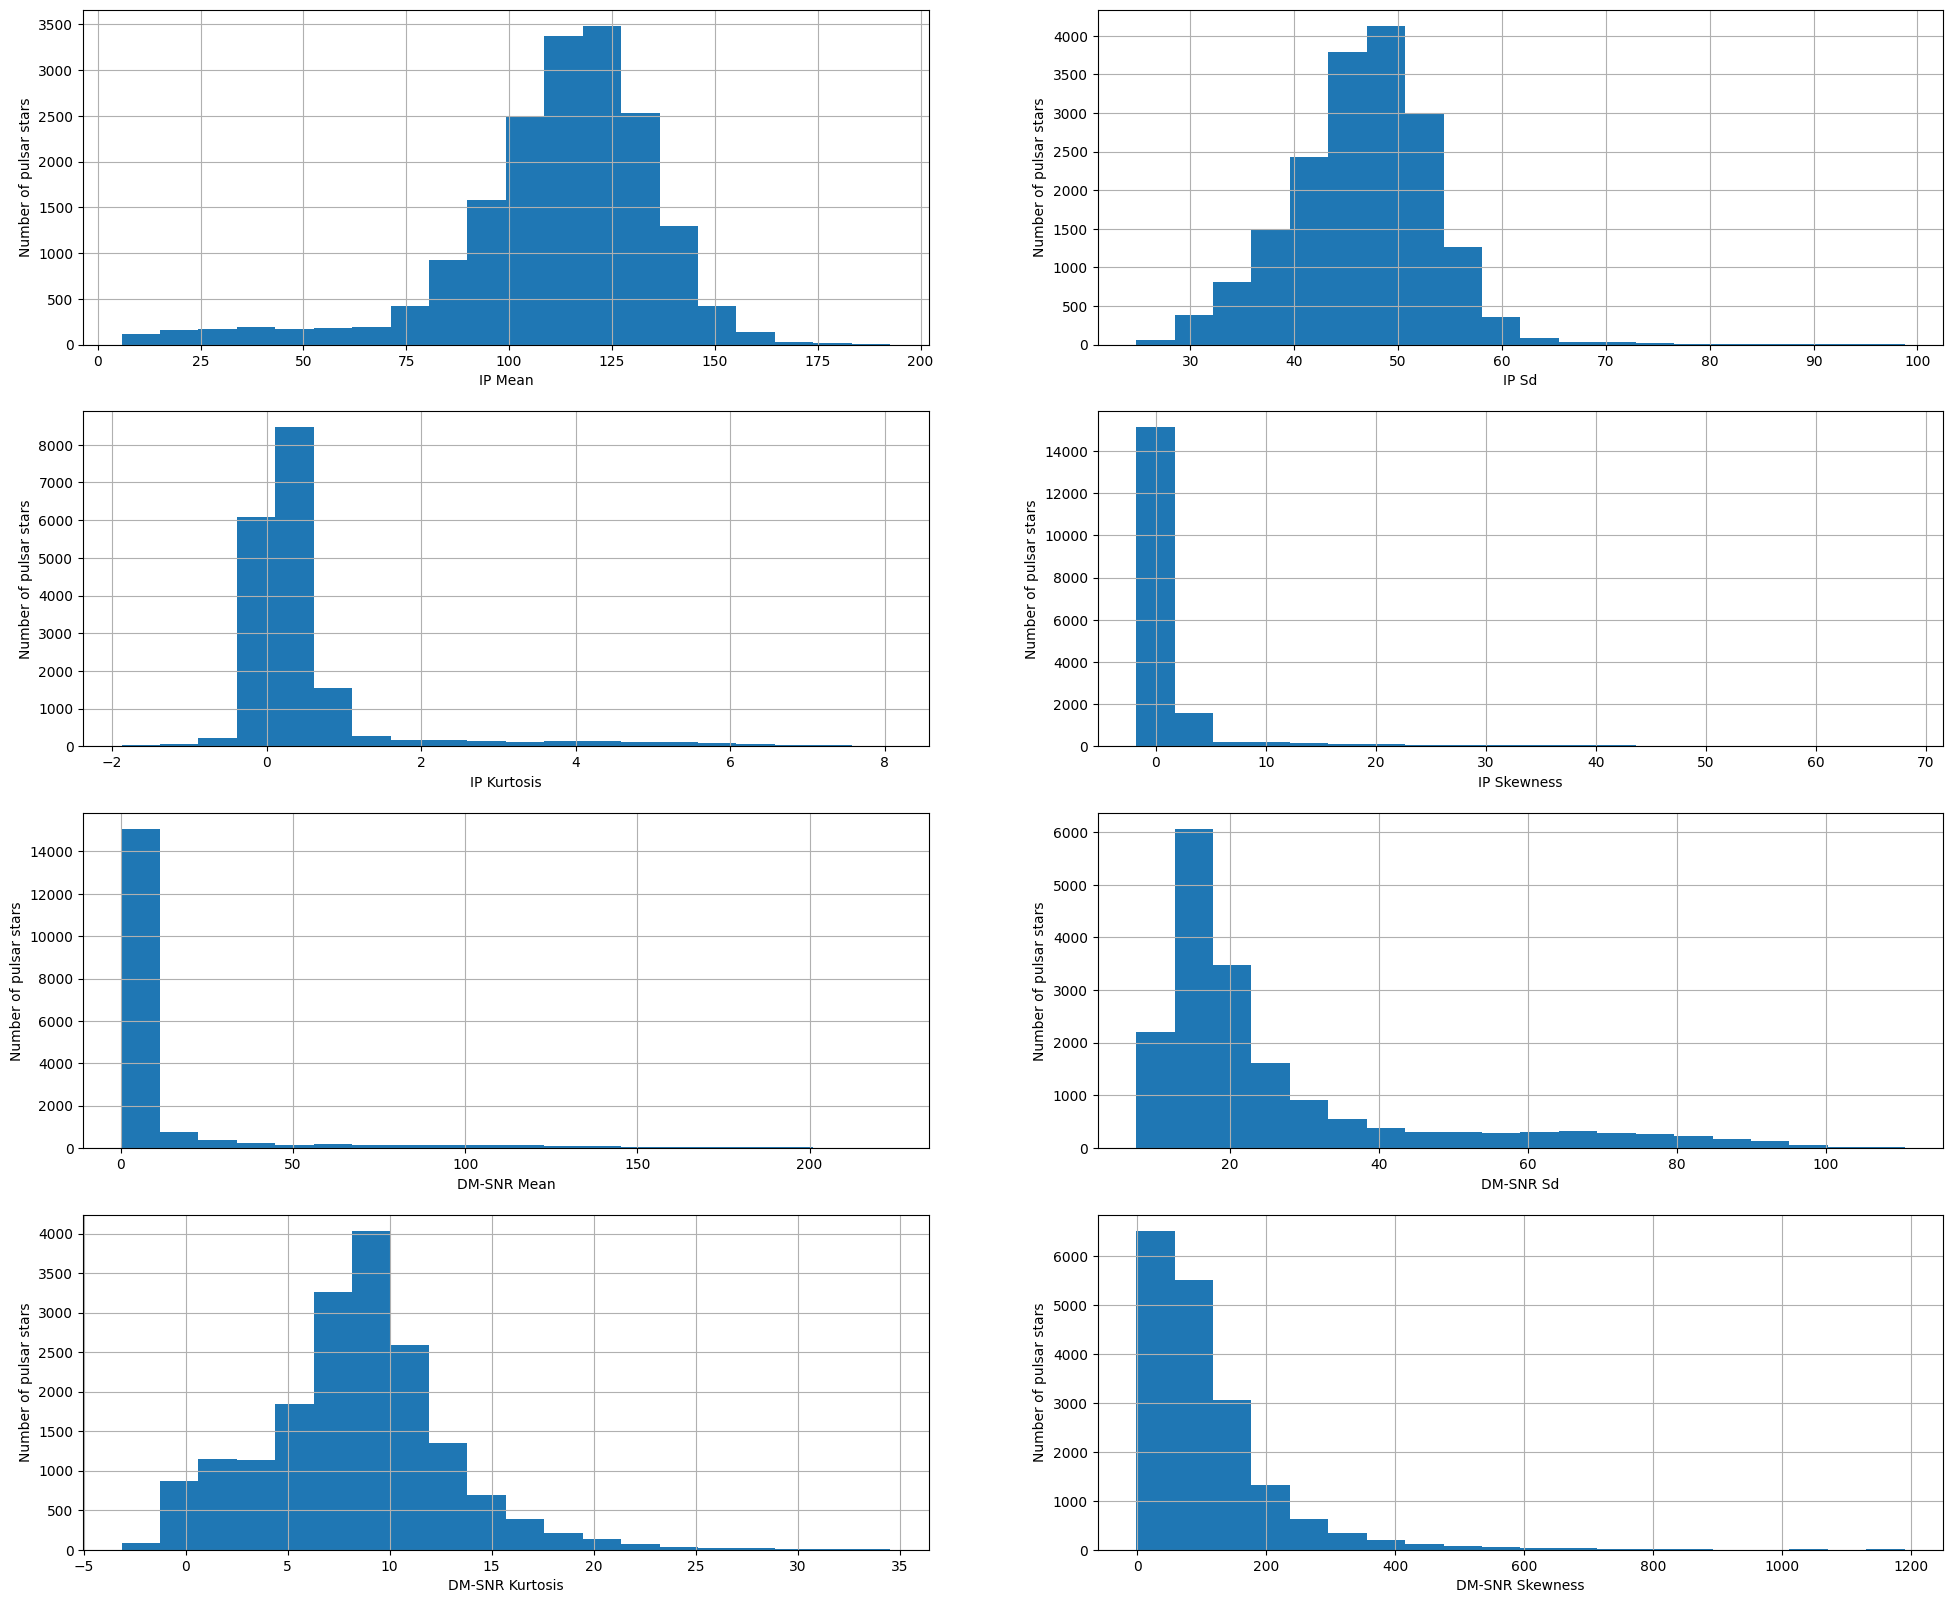

In [ ]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

---

#### Chia dữ liệu và Huấn luyện mô hình

In [ ]:
X = df.drop(['target_class'], axis=1)
y = df['target_class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((14318, 8), (3580, 8))

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.908113e-16,-6.550610e-16,1.042143e-17,3.870815e-17,-8.734147e-17,-1.617802e-16,-1.513588e-17,1.122785e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


##### 1. SVM với tham số mặc định (rbf kernel)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9827


như dữ liệu trên ta đã thấy nó có nhiều ngoại lai

C=100.0

In [ ]:
svc=SVC(C=100.0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9832


C = 1000.0

In [ ]:
svc=SVC(C=1000.0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9816


> Trong trường hợp này, có thể thấy rằng độ chính xác đã giảm với C = 1000.0

##### 2. SVM với linear kernel

C = 1.0

In [ ]:
linear_svc=SVC(kernel='linear', C=1.0)
linear_svc.fit(X_train,y_train)
y_pred_test=linear_svc.predict(X_test)

print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9830


 C=100.0

In [ ]:
linear_svc100=SVC(kernel='linear', C=100.0)
linear_svc100.fit(X_train, y_train)
y_pred=linear_svc100.predict(X_test)
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9832


C=1000.0

In [ ]:
linear_svc1000=SVC(kernel='linear', C=1000.0)
linear_svc1000.fit(X_train, y_train)
y_pred=linear_svc1000.predict(X_test)

print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9832


Không thể khẳng định mô hình tốt vì rõ là dữ liệu nhãn lệch nhưng để chắc chắn hơn làm 1 bước kiểm tra

Tính null_accuracy

In [ ]:
y_test.value_counts()

,count
target_class,
0,3306
1,274


In [ ]:
null_accuracy = (3306/(3306+274))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


> Không cần học gì cả, chỉ đoán class 0 => đã đúng

##### 3. SVM với polynomial kernel

C=1.0

In [ ]:
poly_svc=SVC(kernel='poly', C=1.0)
poly_svc.fit(X_train,y_train)
y_pred=poly_svc.predict(X_test)

print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9807


C=100.0

In [ ]:
poly_svc100=SVC(kernel='poly', C=100.0)
poly_svc100.fit(X_train, y_train)
y_pred=poly_svc100.predict(X_test)

print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9824


##### 4. SVM với sigmoid kernel

C=1.0

In [ ]:
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)
sigmoid_svc.fit(X_train,y_train)
y_pred=sigmoid_svc.predict(X_test)

print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8858


C=100.0

In [ ]:
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0)
sigmoid_svc100.fit(X_train,y_train)
y_pred=sigmoid_svc100.predict(X_test)

print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8855


> sigmoid kernel hoạt động kém giống polynomial kernel

Chúng ta đạt được độ chính xác (accuracy) cao nhất với kernel RBF và Linear khi C = 100.0, với accuracy là 0.9832. Dựa trên phân tích ở trên, ta có thể kết luận rằng mô hình phân loại của chúng ta có độ chính xác rất tốt. Mô hình đang làm rất tốt trong việc dự đoán nhãn lớp.

> Tuy nhiên, điều này không hoàn toàn đúng.
Ở đây, chúng ta đang làm việc với một dataset bị mất cân bằng (imbalanced dataset). Vấn đề là accuracy không phải là thước đo phù hợp để đánh giá hiệu năng dự đoán trong bài toán dữ liệu mất cân bằng.

Một trong những metric để phân tích hiệu năng mô hình trong bài toán mất cân bằng là Confusion Matrix.

#### Ma trận nhầm lẫn

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3289   17]
 [  44  230]]

True Positives(TP) =  3289

True Negatives(TN) =  230

False Positives(FP) =  17

False Negatives(FN) =  44


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.88       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
TP

np.int64(3289)

---

#### ROC Curve

Một công cụ khác để đo lường hiệu năng của mô hình phân loại một cách trực quan là ROC Curve.
ROC Curve là viết tắt của Receiver Operating Characteristic Curve. ROC Curve là một đồ thị thể hiện hiệu năng của mô hình phân loại tại nhiều ngưỡng phân loại (threshold) khác nhau.

ROC Curve biểu diễn True Positive Rate (TPR) theo trục tung và False Positive Rate (FPR) theo trục hoành tại các mức threshold khác nhau.

True Positive Rate (TPR) còn được gọi là Recall, được định nghĩa là tỷ lệ TP trên (TP + FN).

False Positive Rate (FPR) được định nghĩa là tỷ lệ FP trên (FP + TN).

Trong ROC Curve, ta quan tâm đến các cặp giá trị (TPR, FPR) tại các threshold khác nhau. Khi ta giảm threshold, mô hình sẽ phân loại nhiều điểm hơn là positive, dẫn đến:

TP tăng => FP cũng tăng

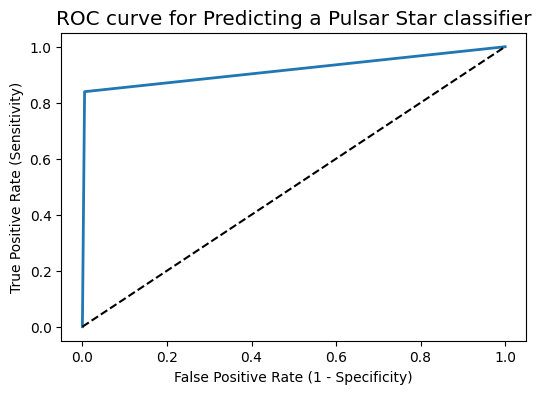

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ROC Curve giúp ta chọn threshold sao cho cân bằng giữa Sensitivity (Recall) và Specificity trong từng bối cảnh cụ thể.

#### ROC AUC

ROC AUC là viết tắt của Receiver Operating Characteristic - Area Under Curve. Đây là một phương pháp để so sánh hiệu năng của các mô hình phân loại.

Mô hình hoàn hảo có ROC AUC = 1

Mô hình đoán ngẫu nhiên có ROC AUC = 0.5

ROC AUC chính là diện tích nằm dưới đường ROC Curve.

In [ ]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9171


In [ ]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9756


---

#### Stratified k-fold Cross Validation

k-fold cross-validation là một kỹ thuật rất hữu ích để đánh giá hiệu năng mô hình.

Tuy nhiên, trong trường hợp này nó không phù hợp vì dataset bị mất cân bằng.
Do đó, với dữ liệu mất cân bằng, tôi sẽ sử dụng một kỹ thuật khác để đánh giá mô hình, gọi là stratified k-fold cross-validation.

- Trong stratified k-fold cross-validation, dữ liệu được chia sao cho tỷ lệ các lớp trong mỗi fold giống với tỷ lệ của toàn bộ dataset và nên suffle trước khi chia

Stratified k-Fold Cross Validation với `linear kerne`


In [ ]:
from sklearn.model_selection import KFold

kfold=KFold(n_splits=5, shuffle=True, random_state=0)
linear_svc=SVC(kernel='linear')
linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [ ]:
print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[0.98296089 0.97458101 0.97988827 0.97876502 0.97848561]


In [ ]:
print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:0.9789


Stratified k-Fold Cross Validation với `rbf kernel`


In [ ]:
rbf_svc=SVC(kernel='rbf')
rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [ ]:
print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

Stratified Cross-validation scores with rbf kernel:

[0.97849162 0.97011173 0.97318436 0.9709416  0.96982397]


In [ ]:
print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.9725


---

#### Chọn tham số = GridSearch CV

1 tổ hợp train 5 lần(kfold=5) mà có 100 tổ hợp => 100*5= 500

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc=SVC()

parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]

grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [ ]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9793


Parameters that give the best results : 

 {'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=10, gamma=0.3)


In [ ]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9835


---